#Final Project
**Rafael Moreno**

Applications of Data Analytics and Development DA516



#Detecting Fake News

This final project focuses on detecting fake news based on news labeled as fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we will initialize a PassiveAggressive Classifier and fit the model.
After that we will use tensorflow and keras to establish a comparison between CNN and more traditional classifiers.

#What is Fake News?

It is a type of yellow journalism. Fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

#The Dataset

This dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

#TfidfVectorizer

![alt text](https://miro.medium.com/proxy/1*nSqHXwOIJ2fa_EFLTh5KYw.png)

Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers. In natural language processing, a common technique for extracting features from text is to place all of the words that occur in the text in a bucket. This aproach is called a **bag of words** model. It’s referred to as a “bag” of words because any information about the structure of the sentence is lost.

The problem with the bag of words approach is that **it doesn’t account for noise**. In other words, certain words are used to formulate sentences but do not add any semantic meaning to the text. On the other hand, words like good and awesome could be used to determine whether a rating was positive or not.

Often times, when building a model with the goal of understanding text, you’ll see all of stop words being removed. Another strategy is to score the relative importance of words using **TF-IDF**.

###TF (Term Frequency): 


![alt text](https://miro.medium.com/proxy/1*HM0Vcdrx2RApOyjp_ZeW_Q.png)


Term Frequency is the number of times a word appears in a document. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

####IDF (Inverse Document Frequency): 

![alt text](https://miro.medium.com/proxy/1*A5YGwFpcTd0YTCdgoiHFUw.png)

Words that occur many times in a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

#What is a PassiveAggressiveClassifier?

Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

In [0]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
#Read the data
df=pd.read_csv('news.csv')
#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
#Get the labels
labels=df.label
labels.head()
texts = df.text
texts.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [0]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2)

In [0]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [0]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


In [0]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[591,  47],
       [ 42, 587]])

#CNN

Deep neural networks take a very different approach to document classification. Firstly, words are represented as embedding vectors with the idea that two words that are semantically similar to each other have similar vectors. Consider the following figure:

![alt text](https://miro.medium.com/max/780/0*MFf7sLI9z4A4xyRw.png)

This figure represents a 2D embedding space with five embedding vectors each representing a different word:

* Red — Queen
* Blue — King
* Green — Man
* Black — Woman
* Yellow — Oil

We can see that concepts that are similar to each other are close together (e.g. man and woman) in this embedding space and concepts not related are further apart (e.g. oil).

Secondly, in deep neural networks documents are no longer compressed into a vector representation of just word occurrences. Instead, deep neural networks process actual sequences of words (coded as integers) as they appear in the documents thereby maintaining the order and contexts of words.

Consider the following code snippet using the Keras tokenizer applied to two sentences:

![alt text](https://i.ibb.co/dB54sRn/Screen-Shot-2019-11-28-at-1-37-45-PM.png)

This will print out the following sequences:

![alt text](https://i.ibb.co/4pty0rQ/Screen-Shot-2019-11-28-at-1-44-47-PM.png)

with a word_index of:

![alt text](https://i.ibb.co/4ZrT5C3/Screen-Shot-2019-11-28-at-1-54-20-PM.png)

These sequences can be directly fed into a deep neural network for training and classification. Notice that word order and context are nicely preserved in this representation.

In [0]:
MAX_SEQUENCE_LENGTH = 5000
MAX_NUM_WORDS = 25000
EMBEDDING_DIM = 300

In [0]:
# vectorize the text samples into a 2D integer tensor 

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
data = pad_sequences(sequences, 
                     maxlen=MAX_SEQUENCE_LENGTH, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 98817 unique tokens.
Shape of data tensor: (6335, 5000)
Shape of label tensor: (6335,)


In [0]:
# split the data into a training set and a validation set   

x_train, x_val, y_train, y_val = train_test_split(data, 
                                                  labels.apply(lambda x: 0 if x == 'FAKE' else 1), 
                                                  test_size=0.2)

Our **CNN** can be broken down into two distinct parts. 
The first part consists of three layers and is responsible for word and sequence processing:

* The Embedding layer — learn word embeddings.
* The Convolution layer — learn patterns throughout the text sequences.
* The Pooling layer — filter out the interesting sequence patterns.

The second part consists of two layers:
* A Dense layer with a ReLU activation function.
* A Dense layer (also the output layer) with a Sigmoid activation function.

This part of the CNN can be viewed as a traditional feed-foward, back-propagation neural network with one hidden layer operating on a feature vector of length 128 computed by the first part of the CNN.

In [0]:
# build a 1D convnet with global maxpooling                                                                      

from keras import layers
from keras.models import Sequential

model = Sequential([
        # part 1: word and sequence processing
        layers.Embedding(num_words,
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=True),
        layers.Conv1D(128, 5, activation='relu'),
        layers.GlobalMaxPooling1D(),
        
        # part 2: classification
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 5000, 300)         7500300   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4996, 128)         192128    
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 7,709,069
Trainable params: 7,709,069
Non-trainable params: 0
____________________________________________

In [0]:
# train the model

history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Train on 5068 samples, validate on 1267 samples
Epoch 1/10
5068/5068 [==============================] - 740s 146ms/step - loss: 0.5273 - acc: 0.7417 - val_loss: 0.3163 - val_acc: 0.8824
Epoch 2/10
5068/5068 [==============================] - 742s 146ms/step - loss: 0.1943 - acc: 0.9355 - val_loss: 0.1901 - val_acc: 0.9219
Epoch 3/10
5068/5068 [==============================] - 741s 146ms/step - loss: 0.0625 - acc: 0.9868 - val_loss: 0.1463 - val_acc: 0.9369
Epoch 4/10
5068/5068 [==============================] - 741s 146ms/step - loss: 0.0159 - acc: 0.9982 - val_loss: 0.1428 - val_acc: 0.9432
Epoch 5/10
5068/5068 [==============================] - 742s 146ms/step - loss: 0.0042 - acc: 0.9998 - val_loss: 0.1450 - val_acc: 0.9479
Epoch 6/10
5068/5068 [==============================] - 741s 146ms/step - loss: 8.6874e-04 - acc: 1.0000 - val_loss: 0.2131 - val_acc: 0.9416
Epoch 7/10
5068/5068 [==============================] - 740s 146ms/step - loss: 3.2665e-04 - acc: 1.0000 - val_loss: 0.1

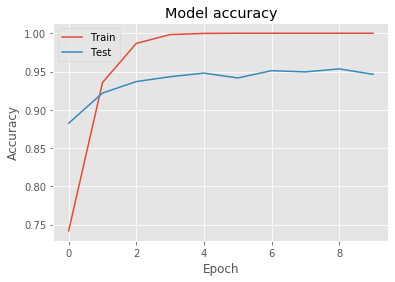

In [0]:
# Plot training & validation accuracy values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Summary

We learned how to detect fake news, we took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 92.82%.


After we trained our network for 10 epochs with a batch size of 128 using an 80–20 training/hold-out set. A couple of notes on additional parameters: 
* The vast majority of documents in this collection is of length 5000 or less. So for the maximum input sequence length for the DNN I chose 5000 words. 
* There are roughly 100,000 unique words in this collection of documents. I arbitrarily limited the dictionary that the DNN can learn to 25% of that: 25,000 words. 
* Finally, for the embedding dimension, I chose 300 simply because that is the default embedding dimension for both word2vec and GloVe.

The results were very good,
Around 95% accuracy for the CNN model.

The performance increase is statistically significant compared to the performance of the PasiveAggressiveClassifier, but it comes with a cost, each epoch takes betwwen 10 to 12 min, so just testing itterations can take a whole day. 

One conclusion that one might draw is that semantic similarity between words and word order or context are crucial for document classification.
